**Name - Aditya Jain**

**Batch No. - DS2310**

**Assingment - HR Analytic**

In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_excel("HR-Employee.xlsx")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 1470
No. of columns 35


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# As we have 35 columns let's sort columns by their datatypes 
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

**Observation-:**

- In this HR Dataset we have 1470 rows and 35 column.
- Out of 35 columns we have 9 features with object datatypes and rest are int64 types.
- Here we have Target Variables 'Attrition'

**These Ordinal features come with following label encoding-:**

- Education: 1- 'Below College',2-'College', 3-'Bachelor', 4-'Masters', 5-'Doctors'.
- EnvironmentSatisfaction: 1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- Jobinvolvement: 1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- JobSatisfaction:  1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- PerformanceRating: 1-'Low', 2-'Average', 3-'Good', 4-'Excellent', 5-'Outstanding'
- RelationshipSatisfaction: 1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- WorkLifeBalance: 1-'Bad', 2-'Good', 3-'Better', 4-'Best'

# Statistical Analysis

**Data Integrity Check**

In [7]:
data.duplicated().sum()

0

**Dataset doesnot contains Any duplicate entry.So Yes to go.**

**Missing value check**

In [8]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                          Missing_values  %Missing values
Age                                    0              0.0
StandardHours                          0              0.0
NumCompaniesWorked                     0              0.0
Over18                                 0              0.0
OverTime                               0              0.0
PercentSalaryHike                      0              0.0
PerformanceRating                      0              0.0
RelationshipSatisfaction               0              0.0
StockOptionLevel                       0              0.0
MonthlyIncome                          0              0.0
TotalWorkingYears                      0              0.0
TrainingTimesLastYear                  0              0.0
WorkLifeBalance                        0              0.0
YearsAtCompany                         0              0.0
YearsInCurrentRole                     0              0.0
YearsSinceLastPromotion                0              0.0
MonthlyRate   

**There is no missing data!! This will make it easier to work with the dataset.**

**Statistical Matrix**

<Axes: >

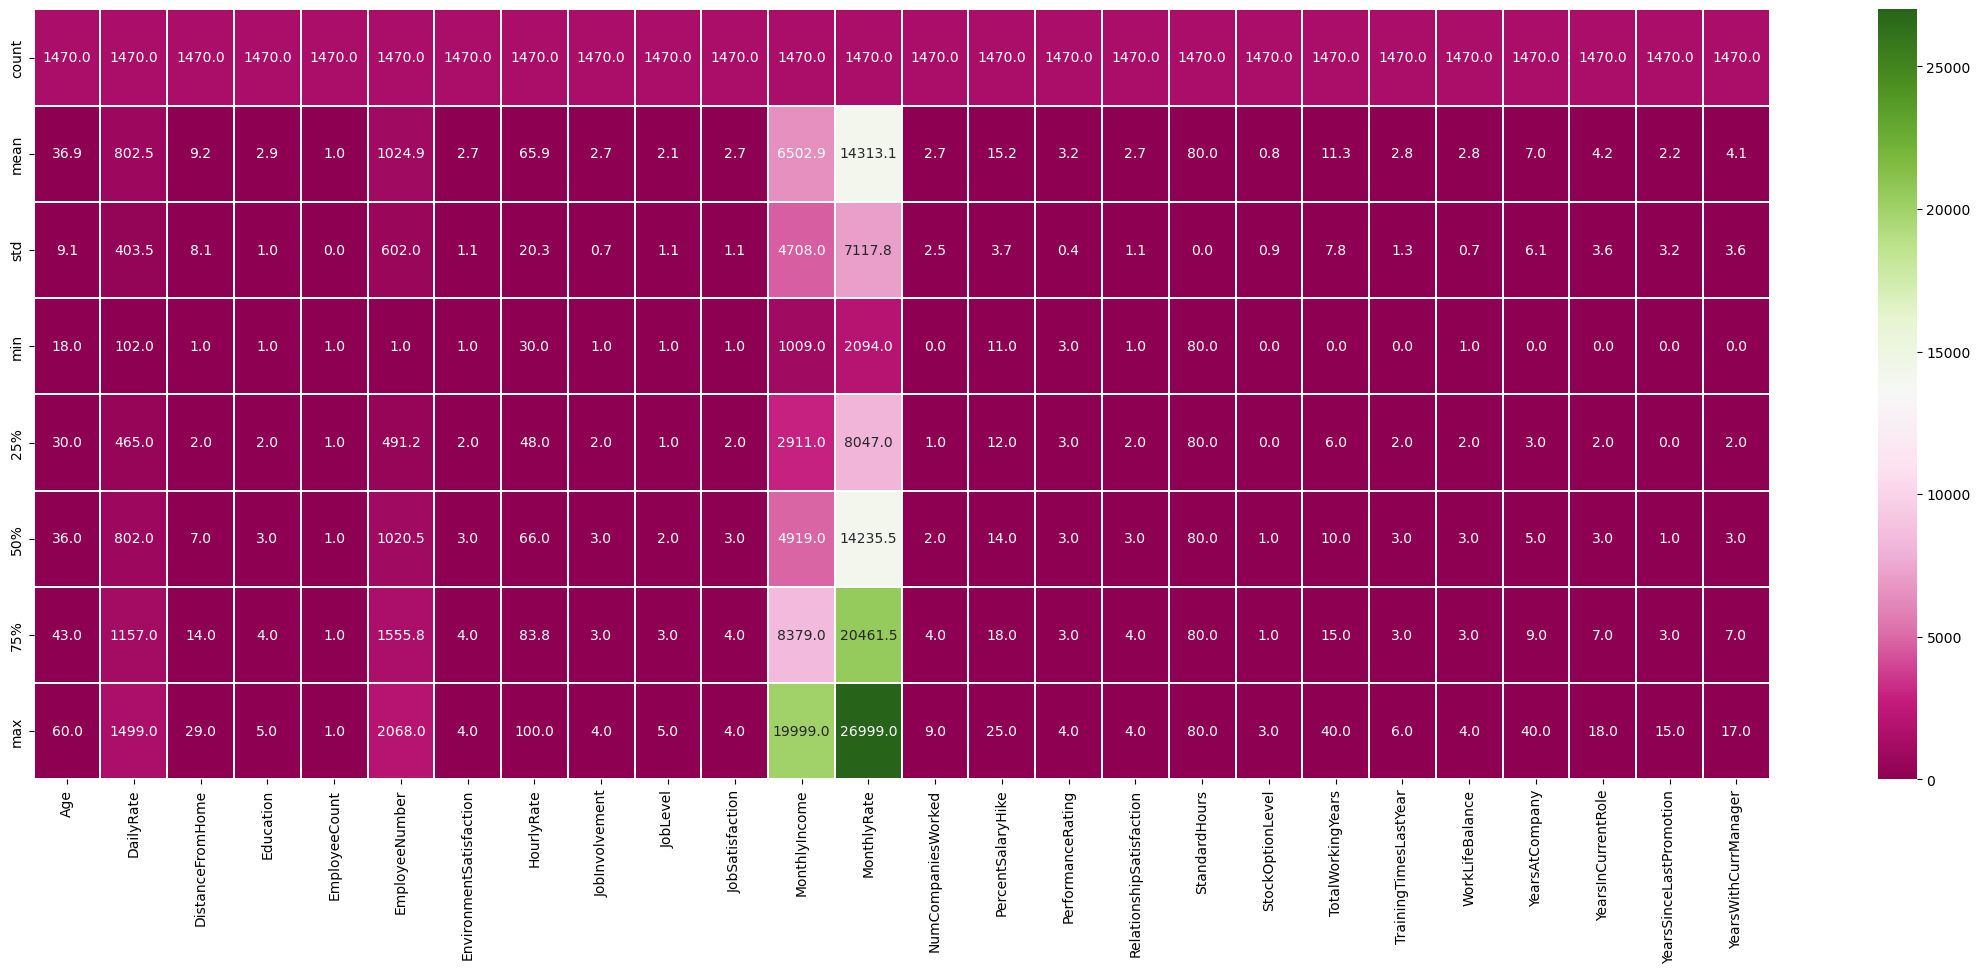

In [9]:
# visulaize the statistic of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(data.describe(),linewidths = 0.1, fmt='0.1f', annot = True, cmap='PiYG')

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Observation-:**

- Minimum employee age is 18 and maximum employee age is 60.
- Average distance from home is 9.1KM. It's means that most of employees travel atleast 18 km in day from home to office.
- 50% of employees has work atleast 2 companies previously.
- For Monthly Income.Monthly rate by looking at 50% and max columns we can say outliers exits in this features.
- By looking at mean and median we can see that some of the features are skew in nature.

**Let's do some Statistical Analysis. Start with target Variables.**

In [11]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

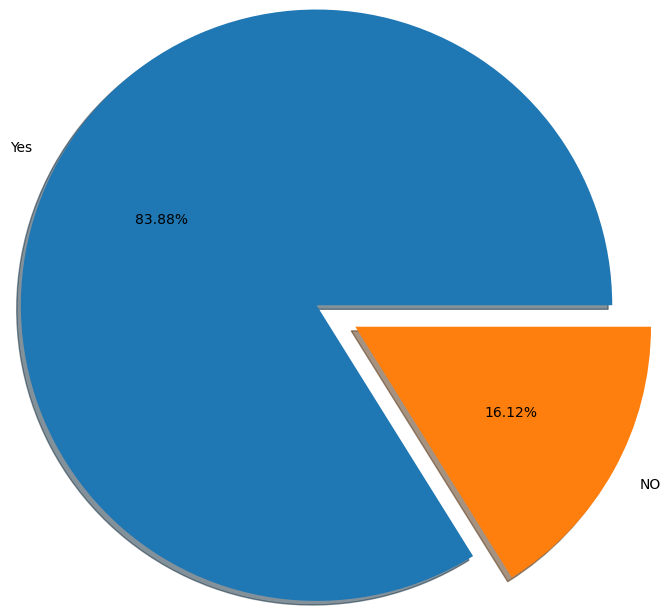

In [12]:
labels ='Yes', 'NO',
fig, ax= plt.subplots()
ax.pie(data['Attrition'].value_counts(),labels = labels, radius= 2, autopct= '%2.2f%%', explode=[0.1,0.2], shadow=True)
plt.show()

**Observation-:**

83.88%(1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization.Making our datasets to be considered imbalanced since more people stay in organisation. than they actually leave.


In [13]:
Category = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in Category:
    print(i)
    print(data[i].value_counts())
    print("="*100)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

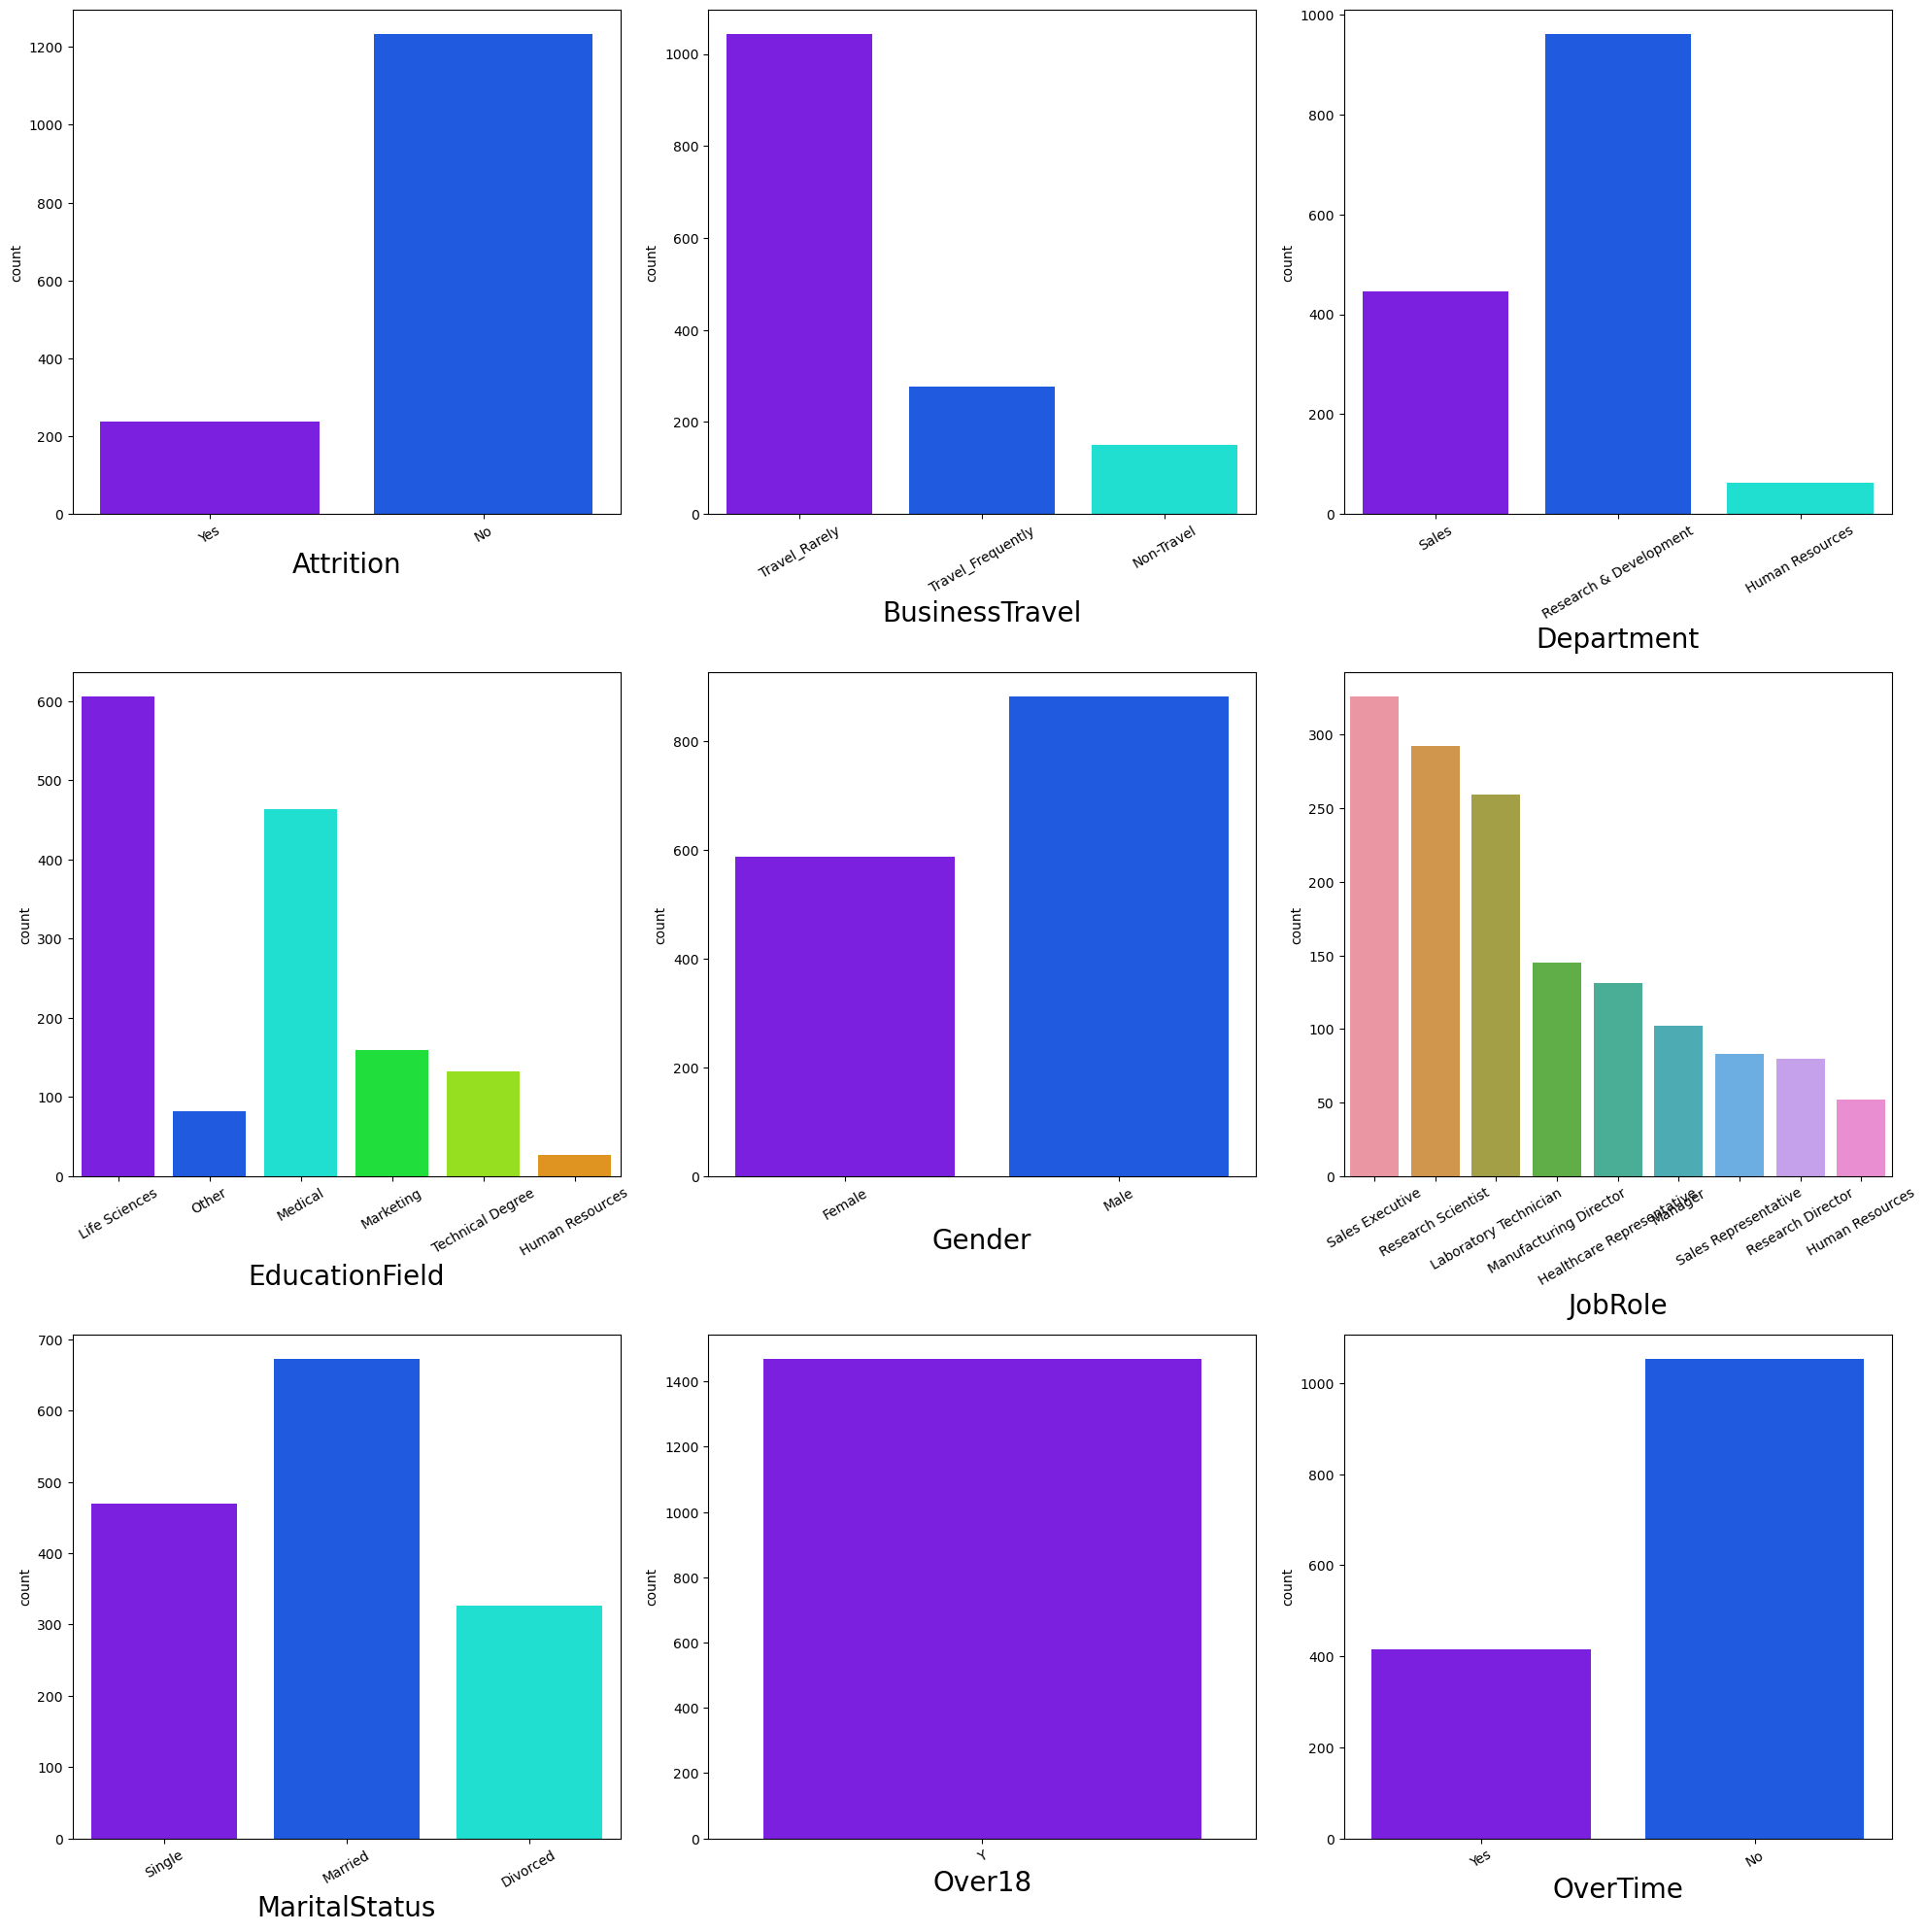

In [14]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1
Category = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=data)
        plt.xlabel(i,fontsize = 20)
        plt.xticks(rotation = 30)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Enlisting Value Counts & Sub-Categories of different Ordinal features availabel

In [15]:
Oridinal = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']
for i in Oridinal:
    print(i)
    print(data[i].value_counts())
    print("="*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


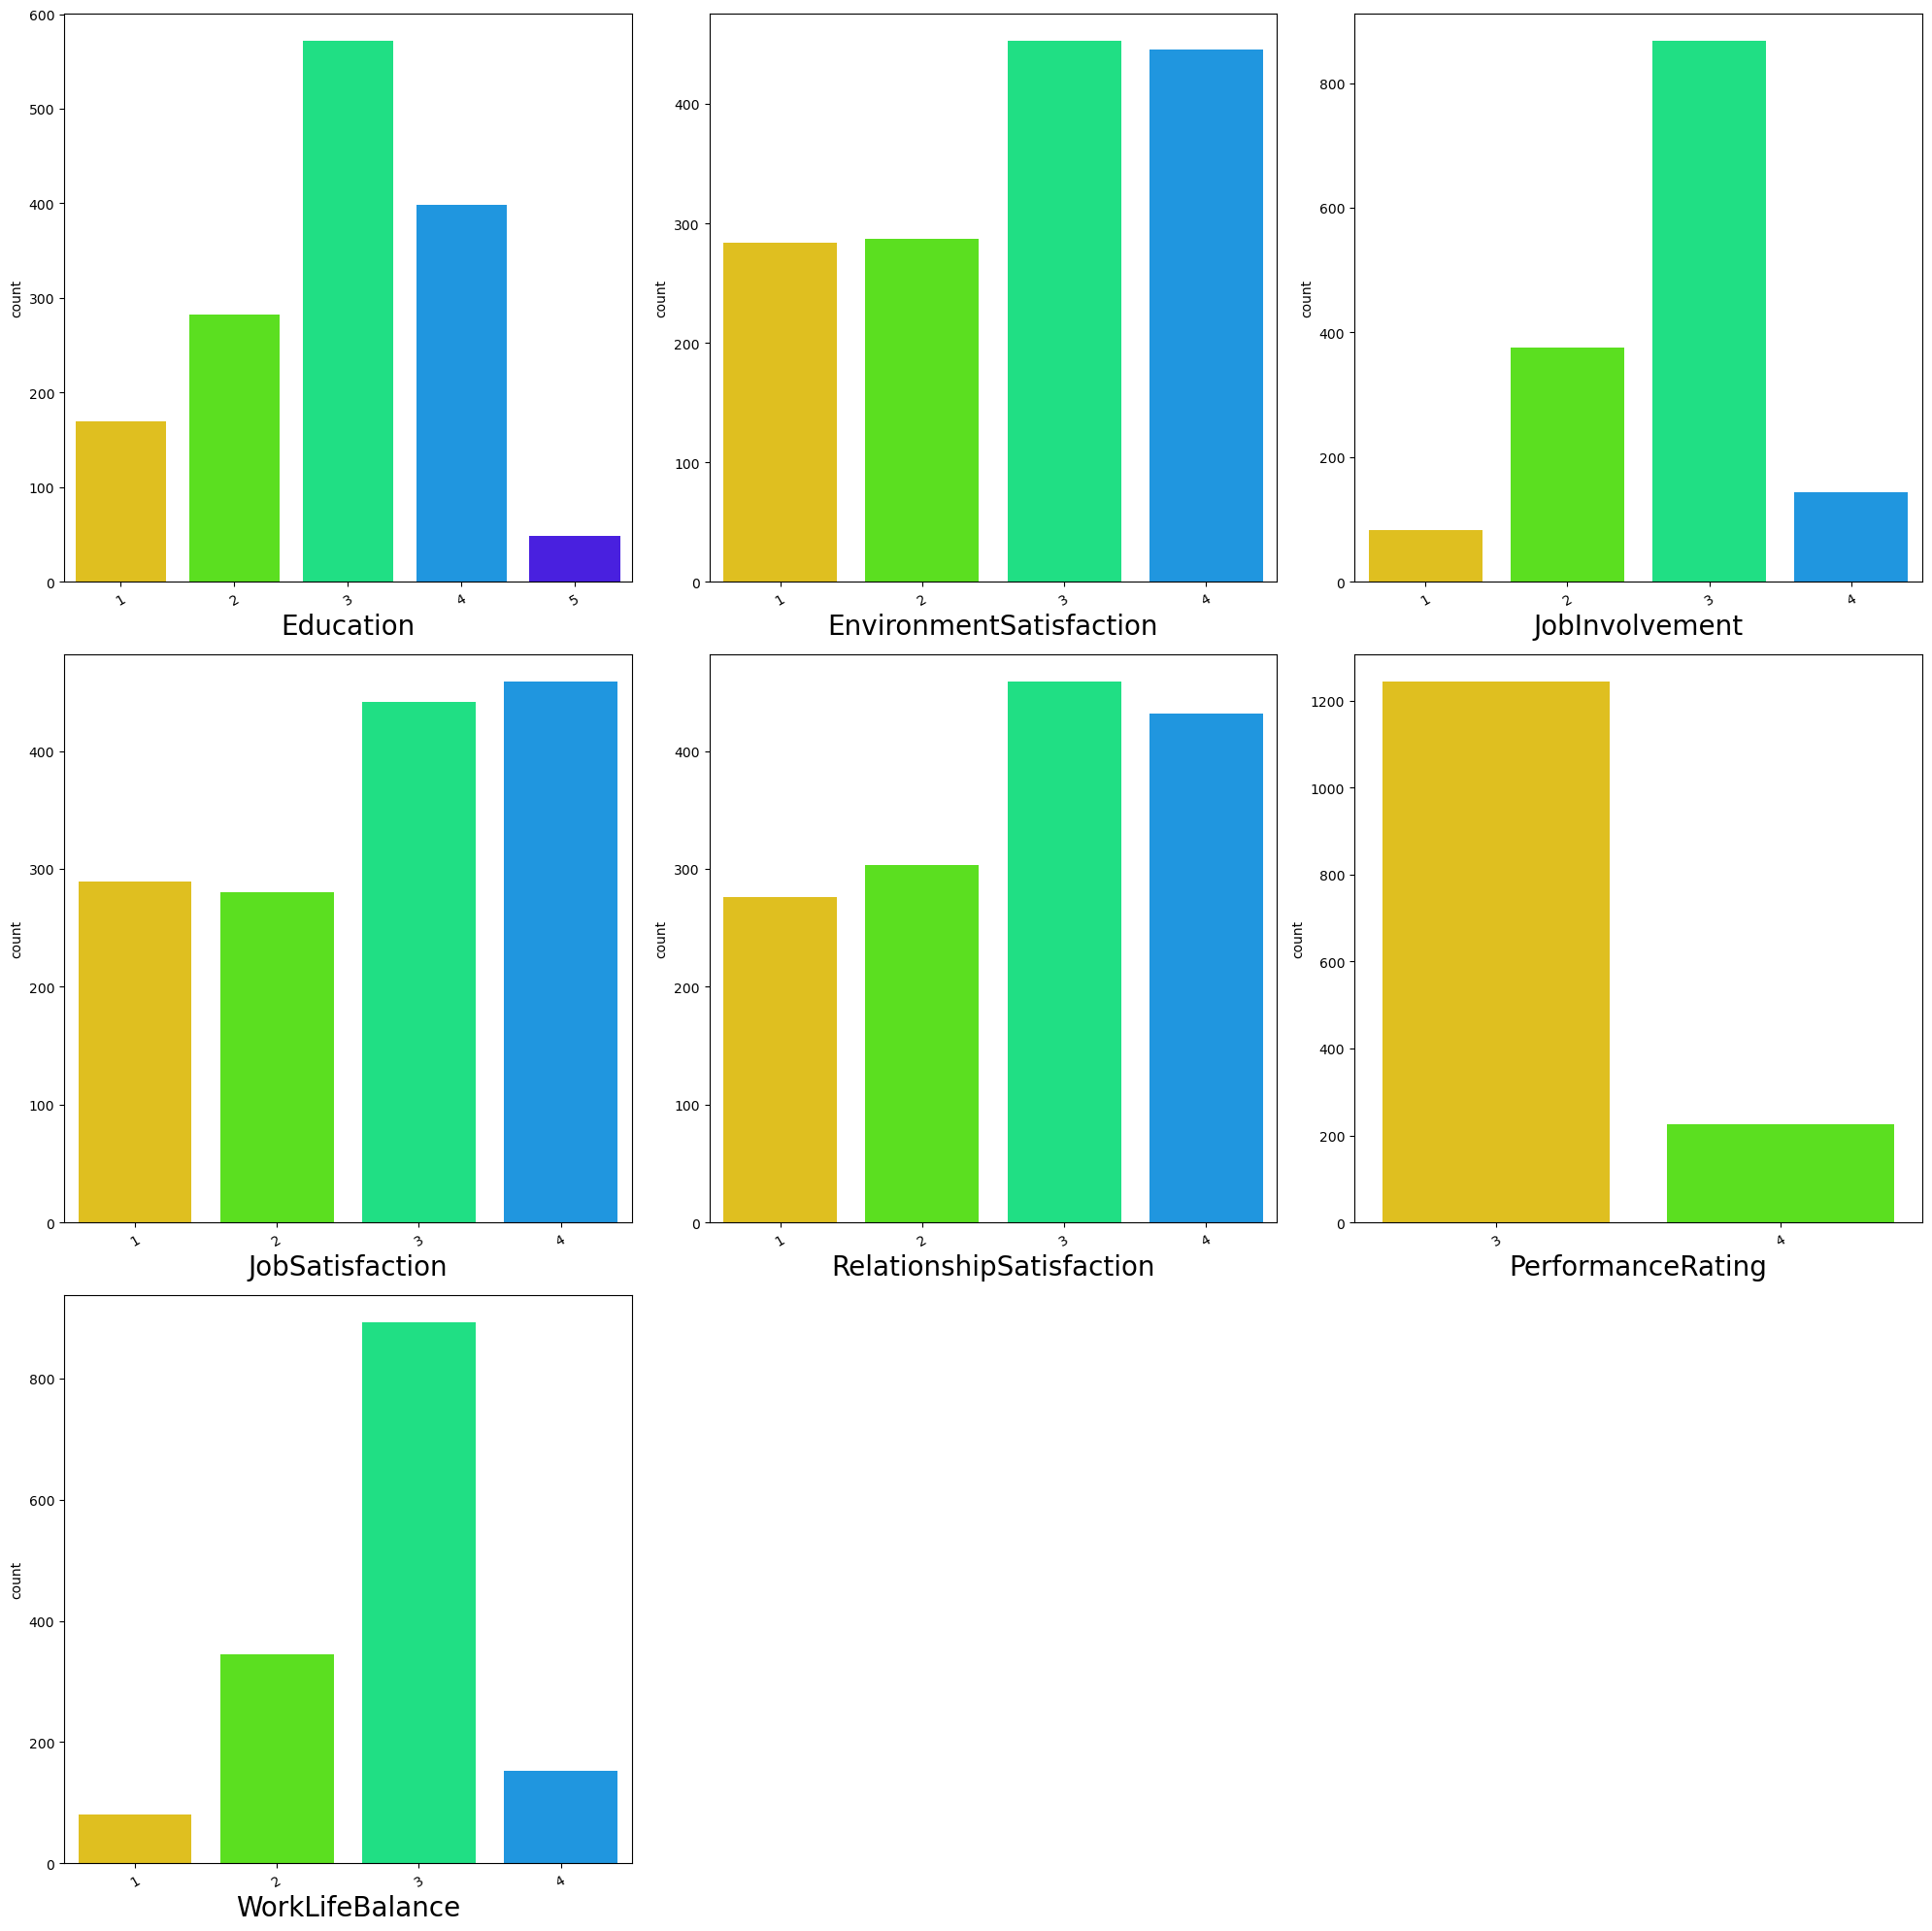

In [16]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1
Oridinal = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']
for i in Oridinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=data)
        plt.xlabel(i,fontsize = 20)
        plt.xticks(rotation = 30)
    plotnumber+=1
plt.tight_layout()
plt.show()

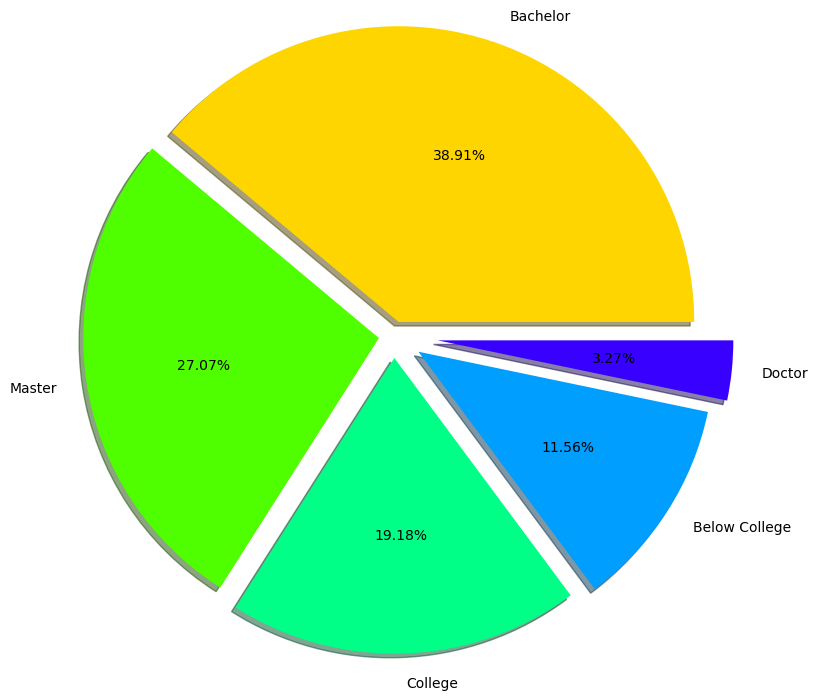

In [17]:
labels ='Bachelor', 'Master','College','Below College','Doctor'
fig, ax= plt.subplots()
ax.pie(data['Education'].value_counts(),labels = labels, radius= 2, autopct= '%3.2f%%', explode=[0.1,0.1,0.15,0.2,0.3], shadow=True)
plt.show()

**Observation-:**

- More than 60% student are educated at bachelors and masters.
- 30% of employees are highly educatedwhich envolves masters and doctor degree.
- 39% of employees are graduated.
- Almost 19% employees are educated upto college & 12% are below colleges.

# Let's try to gain insights on to which department this human resources belong and education need of each department through visulalization.

In [18]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

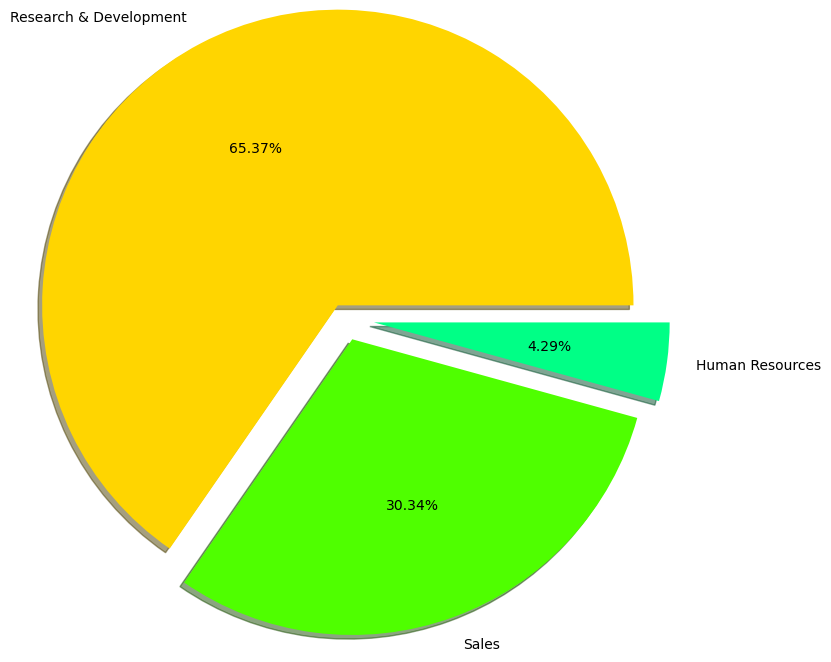

In [19]:
labels ='Research & Development','Sales','Human Resources'
fig, ax= plt.subplots()
ax.pie(data['Department'].value_counts(),labels = labels, radius= 2, autopct= '%3.2f%%', explode=[0.1,0.15,0.2], shadow=True)
plt.show()

In [20]:
pd.crosstab([data.Education],[data.Department], margins = True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


**Observation-:**

- 65.37% of employees belong to Research & Development Department. Out of total 961 Employees no of employee educated at bachelors, Masters, Doctors are 379,225 and 30 respectively.
- Only 63 employee work in HR department.

In [21]:
pd.crosstab([data.Education],[data.Department,data.Attrition], margins = True).style.background_gradient(cmap='summer_r')

# Employee distribution as per education field and level of education

In [22]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

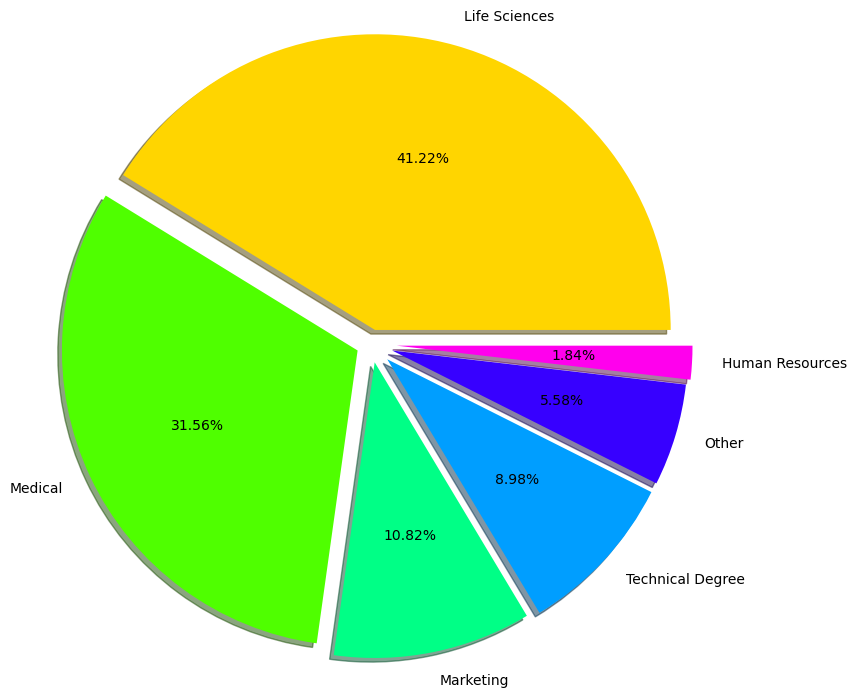

In [23]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig, ax= plt.subplots()
ax.pie(data['EducationField'].value_counts(),labels = labels, radius= 2, autopct= '%3.2f%%', explode=[0.1,0.1,0.125,0.15,0.15,0.175], shadow=True)
plt.show()

In [24]:
pd.crosstab([data.Education],[data.EducationField], margins = True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


**Observation-:**

- 41.22 % Employee comes from life science background followed by Medical Profession with 31.56
- Most employees with technical degree are bachelors
- Most of employee have master and doctors bolong to life science and medical domain.
- 50 % employesin sales department having background of life science and medical.So it will be attrition rate in these employees.


# Let's work with job role

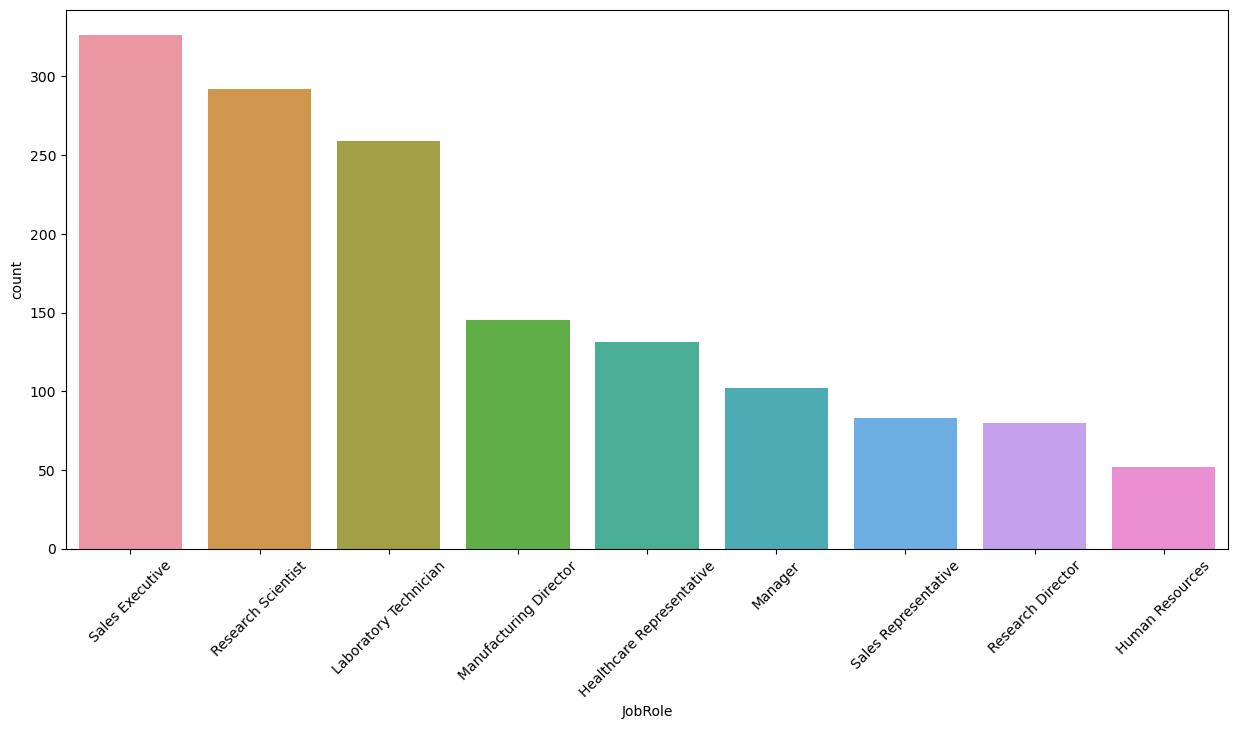

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='JobRole',data = data)
plt.xticks(rotation = 45)
plt.show()

**Before going for Attrition by job role.**

First built matrix of department vs job role which will give us idea about number of employees of different job roles across department

In [26]:
pd.crosstab([data.JobRole],[data.Department], margins = True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


**Observation-:**

- There are 3 jobs in HR Department, maximum of which are sales Executive with 446 Total employees.
- Human Resources department has 2 job role. Hr & Manager.

<Figure size 1200x1000 with 0 Axes>

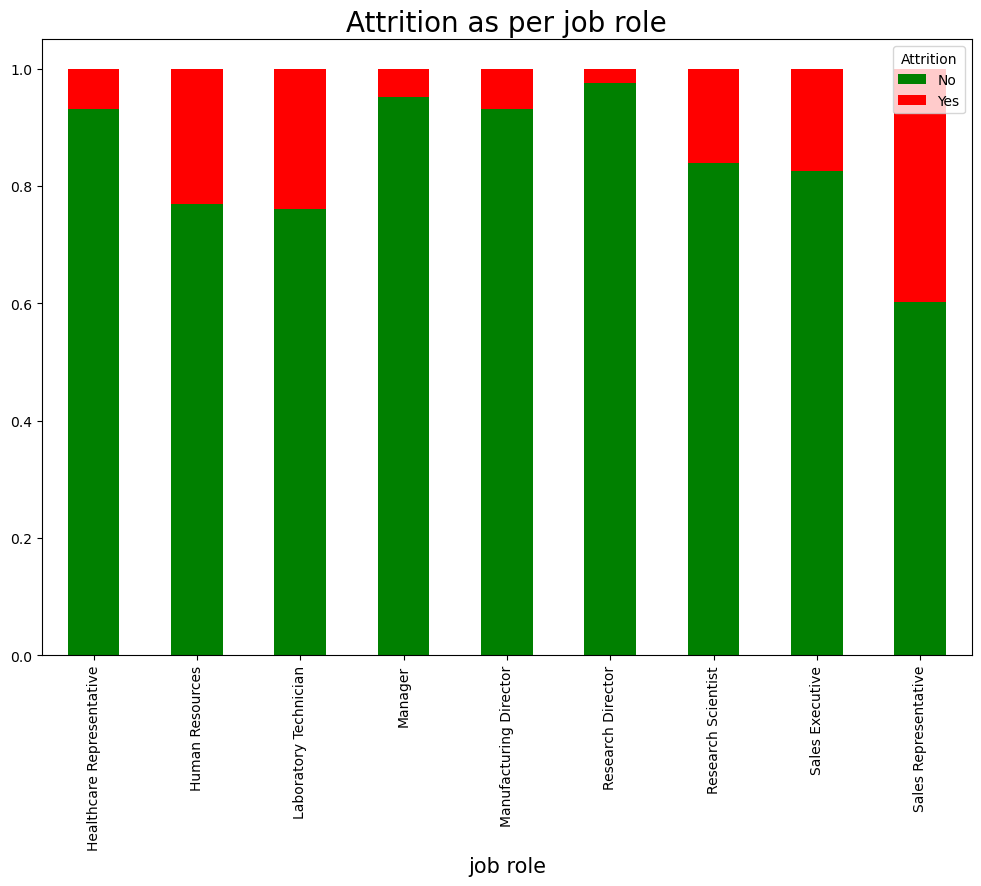

In [27]:
plt.figure(figsize=(12,10))
da = pd.crosstab(data['JobRole'],data['Attrition'])
da.div(da.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, color = ['green','red'],figsize=(12,8))
plt.title("Attrition as per job role", fontsize = 20)
plt.xlabel("job role",fontsize = 15)
plt.show()

**We all can definetly see Red Signal for difference Managers & HR of Respective job role in above barplot!!!**

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [28]:
pd.crosstab([data.JobRole,data.Department],[data.Attrition], margins = True).style.background_gradient(cmap='summer_r')

In [29]:
# Grouping Numeric Features
Numeric = ['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
          'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
          'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
          'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# Voilinplot of Numeric Variables

In [30]:
#Grouping Numeric Features
Numeric_int = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
               'NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear',
             'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' ]

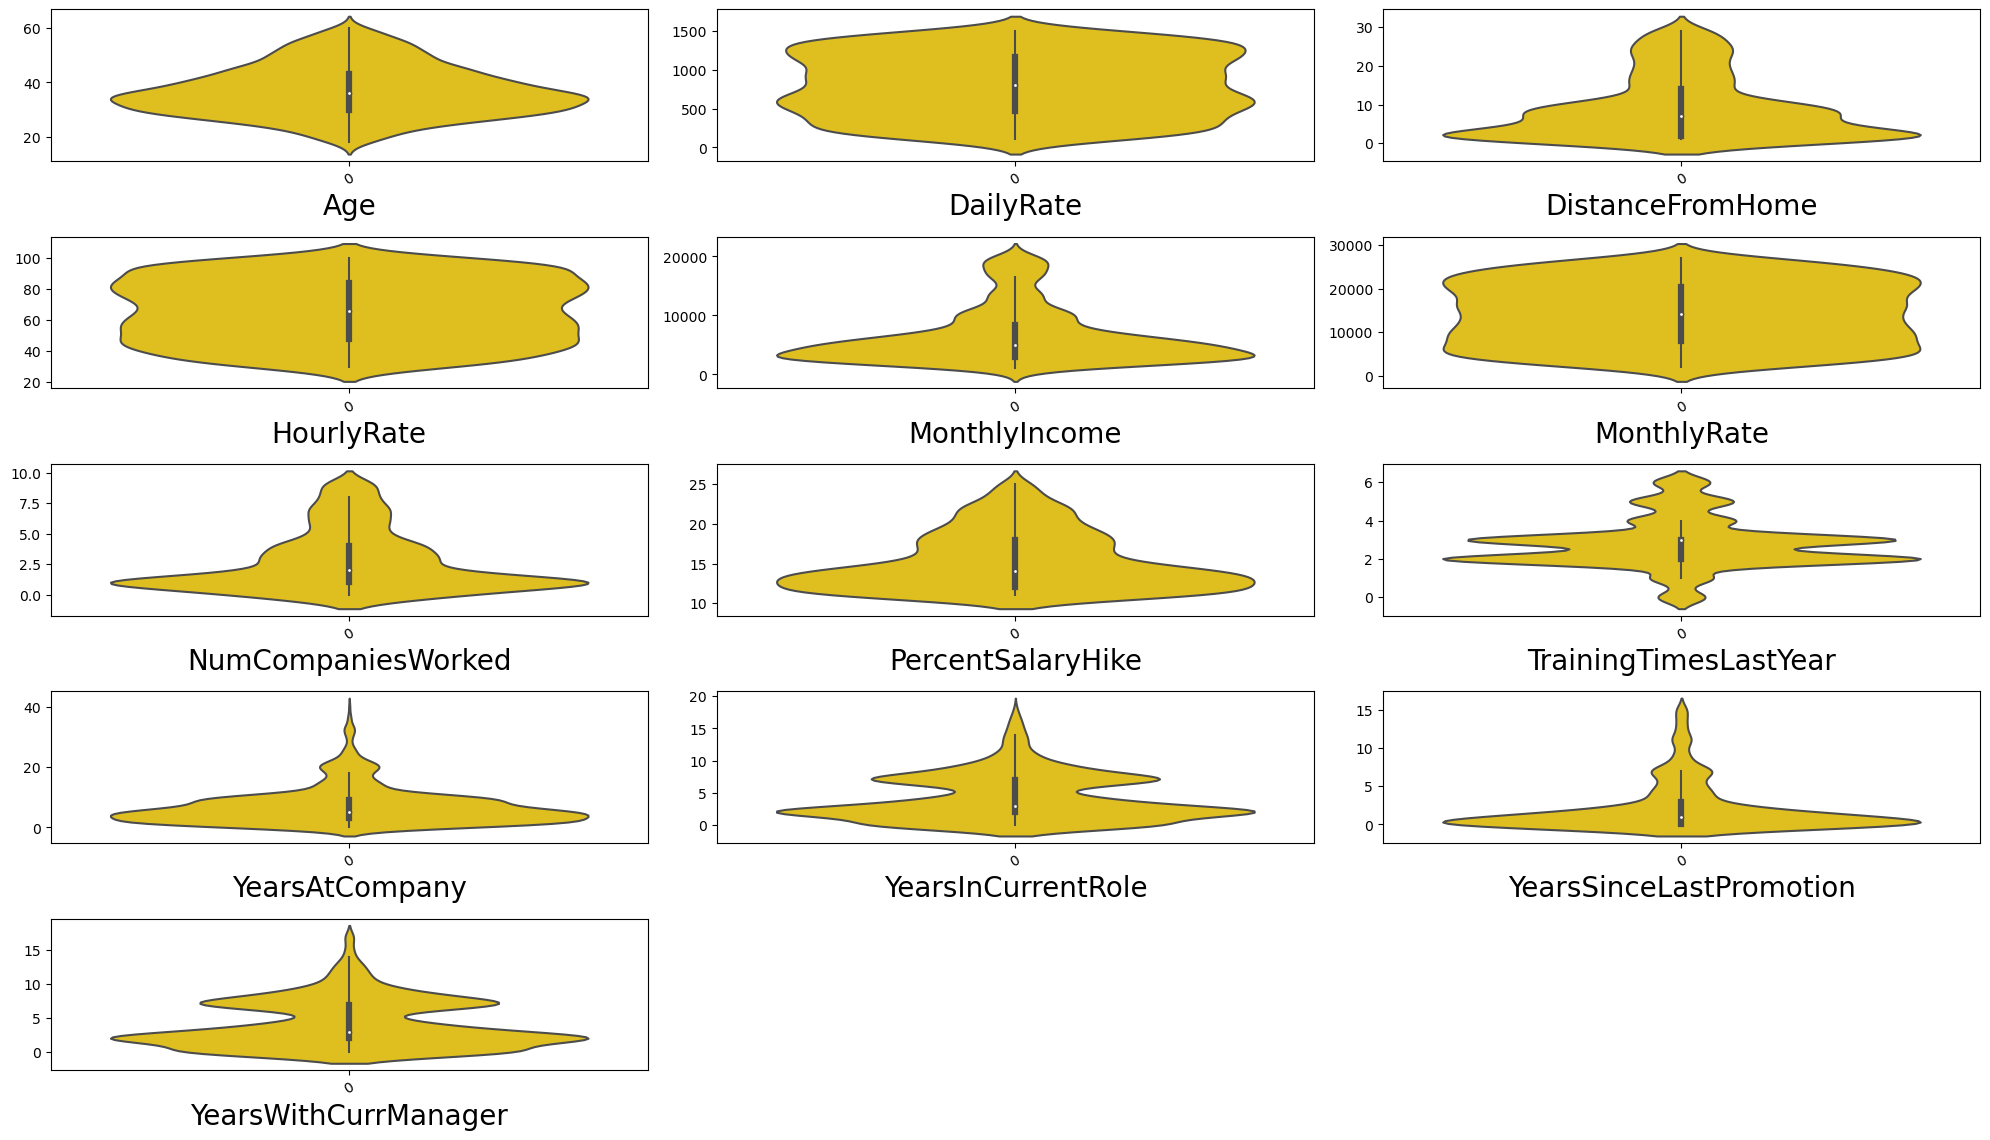

In [31]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(data[i])
        plt.xlabel(i,fontsize = 20)
        plt.xticks(rotation = 30)
    plotnumber+=1
plt.tight_layout()
plt.show()

**Observation-:**

- For Majority of people have spend 3 to 10 years at company.
- Most of people staying company upto 2 years after promotion.
- Majority of people are train 2-3 times inlast years. If employees leaves job then it loss investment for company.
- Majority of people stay in same role for maximum 4 yrs.
- Majority of Employees have salary hike 10 to 15%.

# Age V/S Attrition

<Axes: xlabel='Age', ylabel='count'>

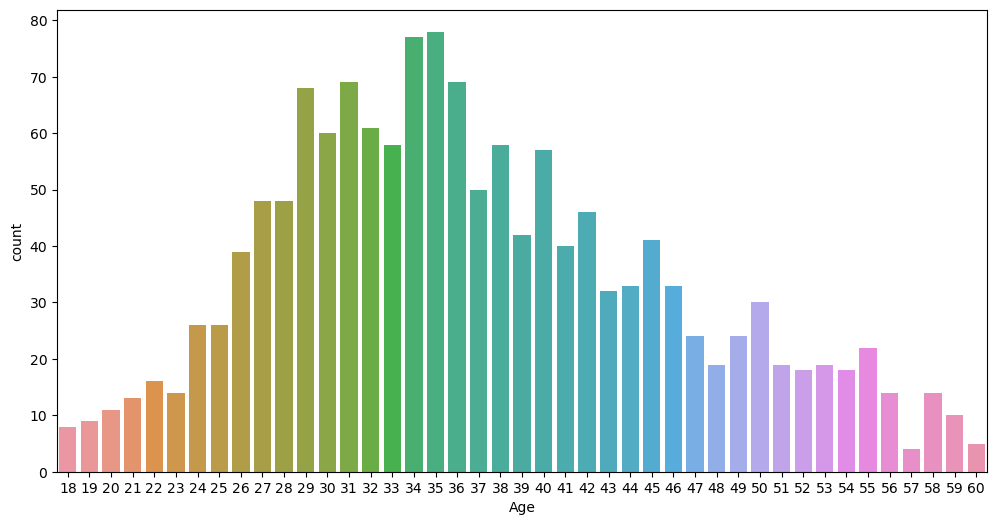

In [32]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Age',data=data)

<Axes: xlabel='Age', ylabel='count'>

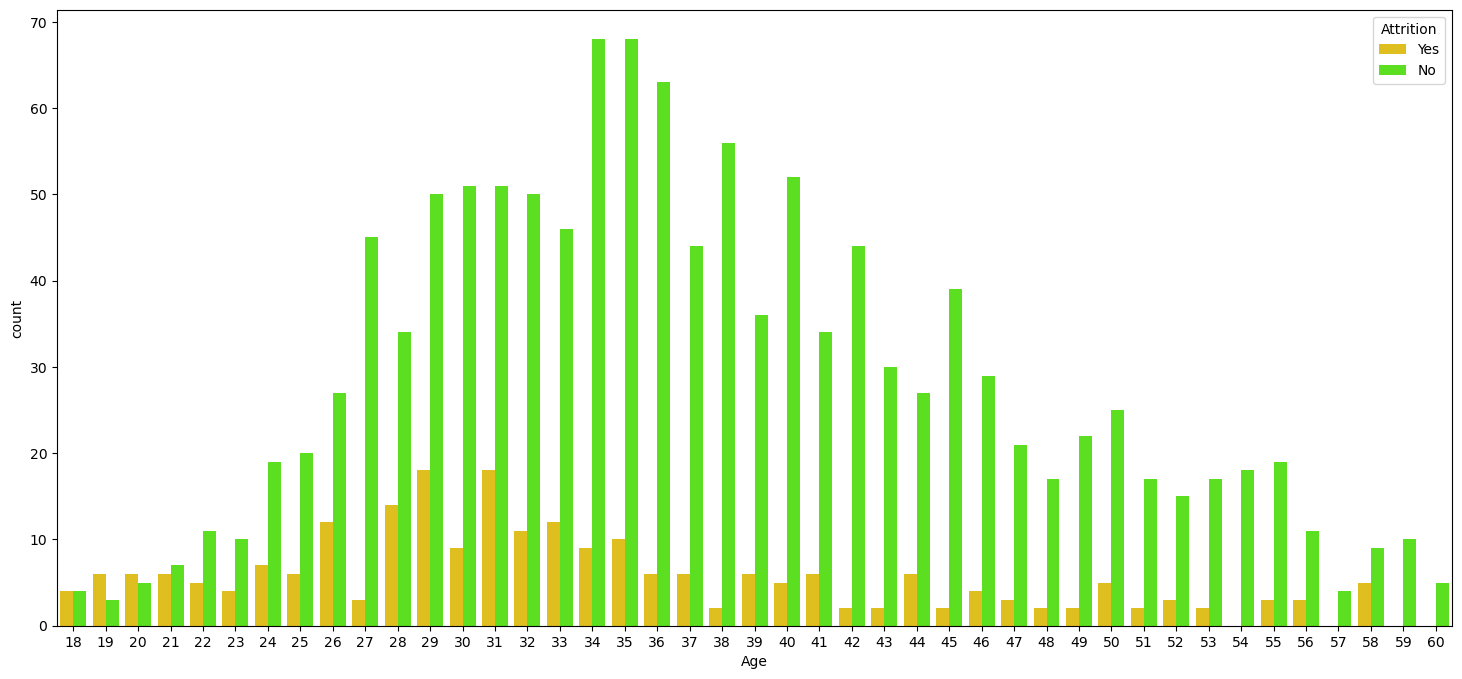

In [33]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition',data=data)

**Observation-:**

- The Attrition rate is minimum between the Age years of 34 and 35
- The Attrition rate is maximum between the Age years of 29 and 31

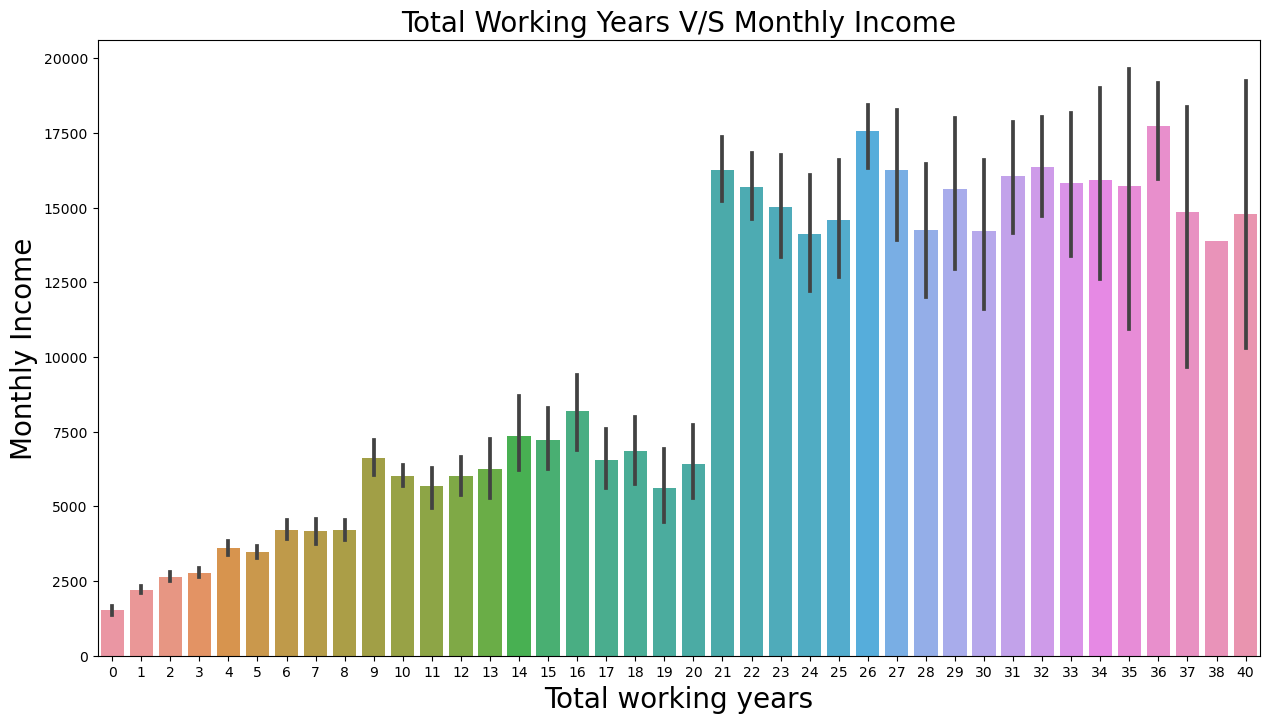

In [34]:
plt.figure(figsize = (15,8))
sns.barplot(x='TotalWorkingYears', y='MonthlyIncome',data = data)
plt.xlabel("Total working years",fontsize = 20)
plt.ylabel("Monthly Income",fontsize = 20)
plt.title("Total Working Years V/S Monthly Income", fontsize = 20)
plt.show()

**Observation-:**

Monthly income is highest for the employees with 21 or more number of total working years.

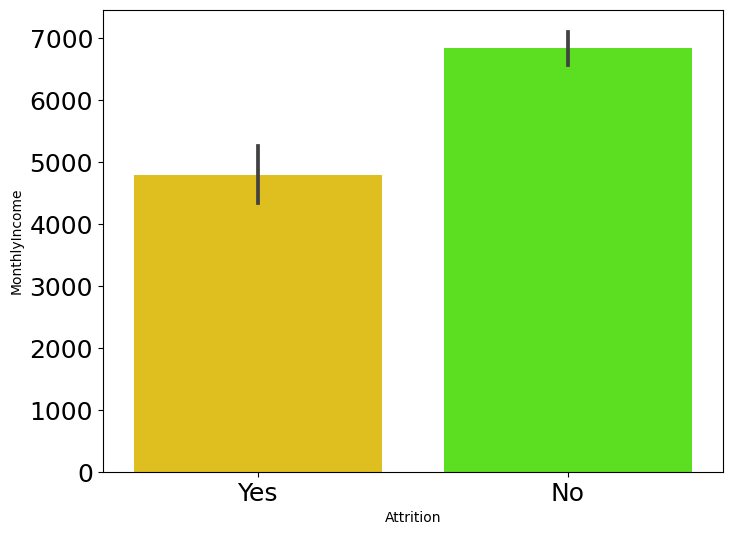

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome', data = data)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

**Observation-:**

The rate of Attrition is high when the employees did not got promoted since 1.8 years.

# Encoding Categorial Data

In [36]:
#using label encoder on target variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data["Attrition"])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
#Dropping unnecessary columns
data.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"], axis =1, inplace = True)

In [38]:
data.shape

(1470, 31)

In [39]:
# oridinal Encoding for oridinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encoder(data, column):
    data[column] = oe.fit_transform(data[column])
    return data
oe_col = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
data = ordinal_encoder(data, oe_col)
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Outlier detection and removal

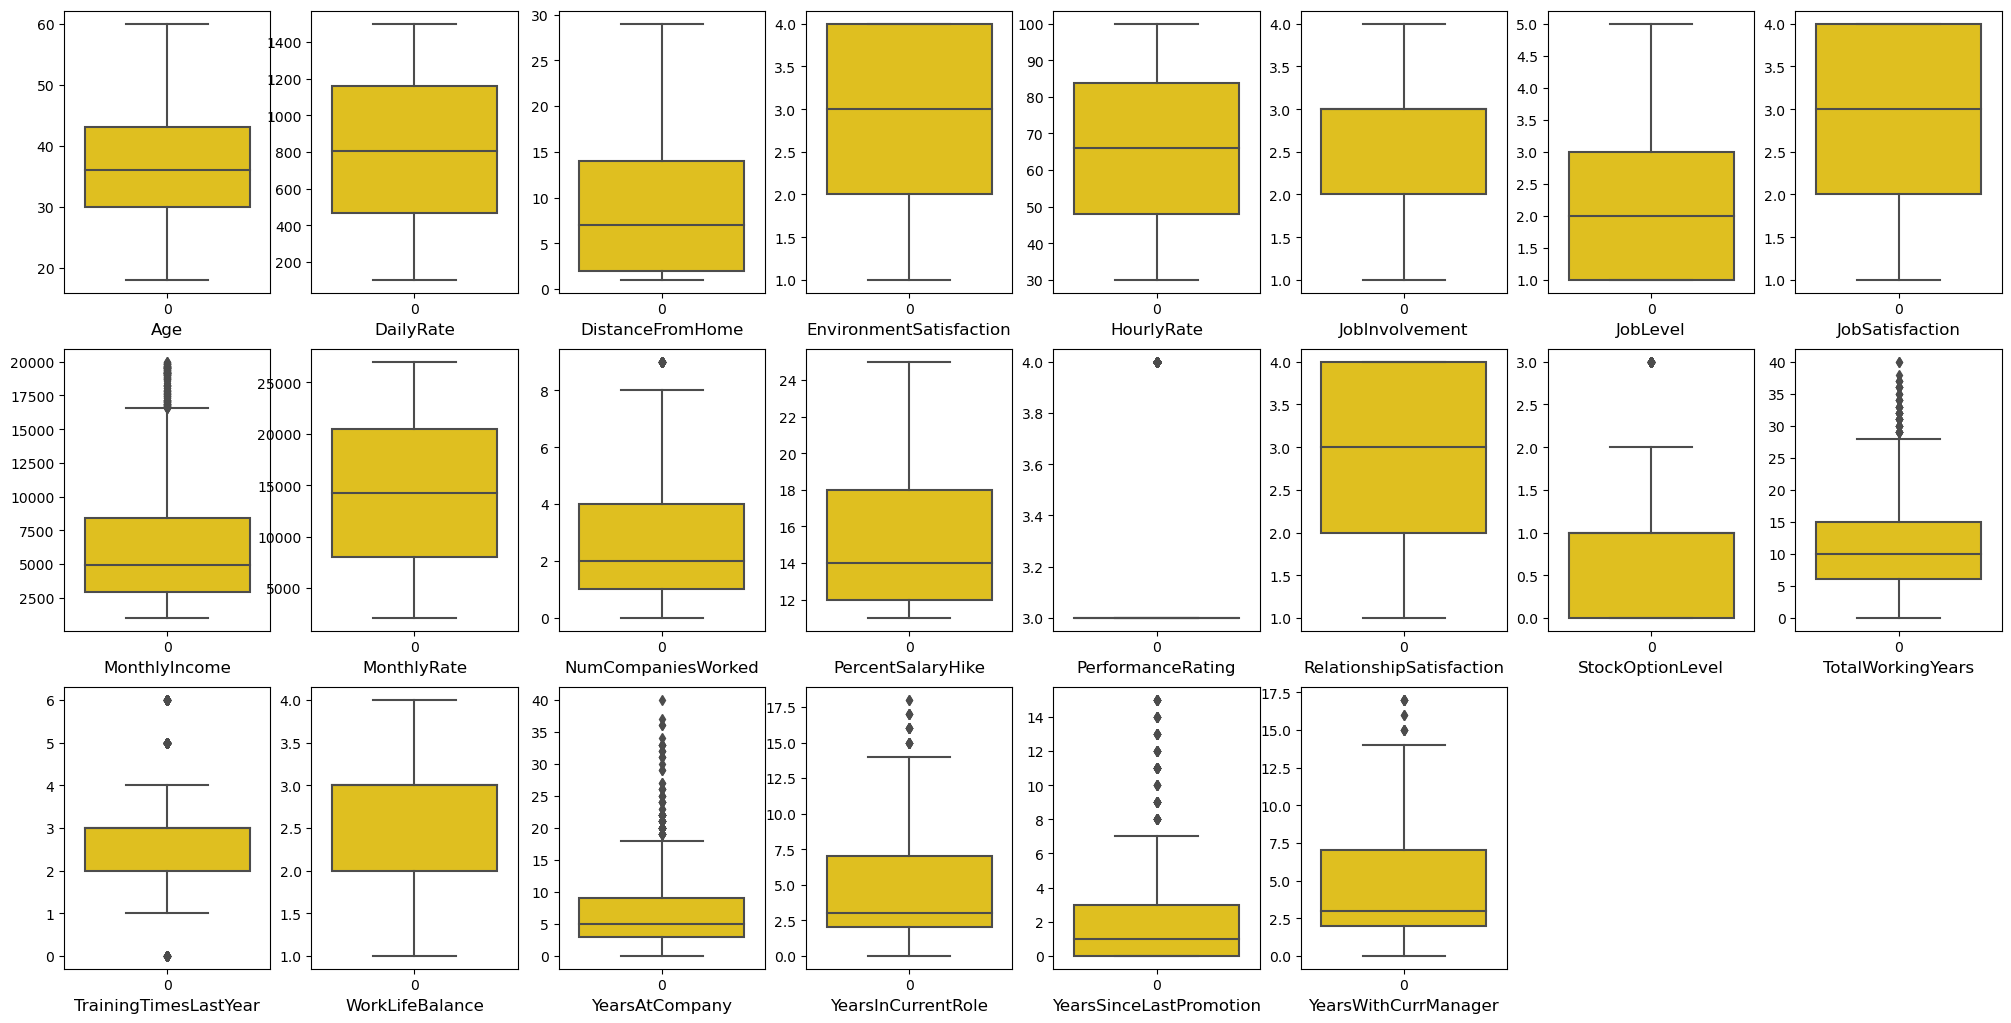

In [40]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1
for column in Numeric:
    if plotnumber <=28:
        ax = plt.subplot(7,8, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

# Features Contain Outliers

"MonthlyIncome","NumCompaniesWorked","PerformanceRating","StockOptionLevel","TotalWorkingHours","TrainingTimesLastYear",

"YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Attrition".

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)


In [42]:
print("Percentage Data Loss",((1470-1387)/1470)*100,'%')

Percentage Data Loss 5.646258503401361 %


# Features Selection and Engineering

In [43]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [44]:
# Spliting data in target and dependent features
x = data.drop(['Attrition'], axis = 1)
y = data['Attrition']

# Transforming skew data using power transform

In [45]:
from sklearn.preprocessing import power_transform
data = power_transform(x)
data = pd.DataFrame(data, columns=x.columns)
data.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

**Observation-:**

- For Numeric features skewness is transform within permissible limit.
- For ordinal features & categorial features skew parameter irrevalent

# Corrleation

In [46]:
data.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.023122,0.008698,-0.031705,-0.020217,0.222197,-0.042503,0.010458,-0.034937,0.024993,...,0.000396,0.049067,0.074398,0.688330,-0.017274,-0.019839,0.296016,0.214870,0.181112,0.205007
BusinessTravel,0.023122,1.000000,-0.002284,-0.008546,-0.004196,0.002295,0.033321,0.006739,-0.020448,0.027346,...,-0.026814,-0.039262,-0.008863,0.032963,0.011046,-0.013531,-0.013268,-0.023616,-0.034572,-0.019191
DailyRate,0.008698,-0.002284,1.000000,0.009475,-0.006339,-0.015889,0.038007,0.018745,-0.009390,0.024923,...,0.000446,0.009514,0.041513,0.020035,0.001518,-0.040560,-0.012831,0.010738,-0.038267,-0.003915
Department,-0.031705,-0.008546,0.009475,1.000000,0.028267,0.008091,0.083399,-0.018705,-0.042226,-0.003057,...,-0.023715,-0.021470,-0.011815,-0.007675,0.040729,0.019835,0.019416,0.051042,0.019560,0.025185
DistanceFromHome,-0.020217,-0.004196,-0.006339,0.028267,1.000000,0.018890,0.016314,-0.010807,0.007120,0.018471,...,0.011620,0.008565,0.026372,-0.006758,-0.019278,-0.026194,0.006935,0.014965,-0.001965,0.006663
Education,0.222197,0.002295,-0.015889,0.008091,0.018890,1.000000,-0.040600,-0.027374,-0.015405,0.017171,...,-0.023231,-0.011414,0.015644,0.168722,-0.021986,0.012489,0.063270,0.059071,0.031791,0.057298
EducationField,-0.042503,0.033321,0.038007,0.083399,0.016314,-0.040600,1.000000,0.038244,-0.008876,-0.019989,...,-0.002094,-0.006867,-0.015419,-0.013070,0.054753,0.042226,-0.000861,0.001852,0.014959,0.013809
EnvironmentSatisfaction,0.010458,0.006739,0.018745,-0.018705,-0.010807,-0.027374,0.038244,1.000000,0.001118,-0.052050,...,-0.029372,0.006627,0.012090,-0.015235,-0.018413,0.025734,0.006821,0.016828,0.028181,-0.000664
Gender,-0.034937,-0.020448,-0.009390,-0.042226,0.007120,-0.015405,-0.008876,0.001118,1.000000,0.000237,...,-0.013859,0.022709,0.011432,-0.044449,-0.037641,0.000237,-0.041930,-0.038321,-0.026019,-0.026981
HourlyRate,0.024993,0.027346,0.024923,-0.003057,0.018471,0.017171,-0.019989,-0.052050,0.000237,1.000000,...,-0.002657,0.001166,0.049036,-0.007556,-0.011174,-0.009125,-0.028621,-0.029461,-0.050841,-0.018600


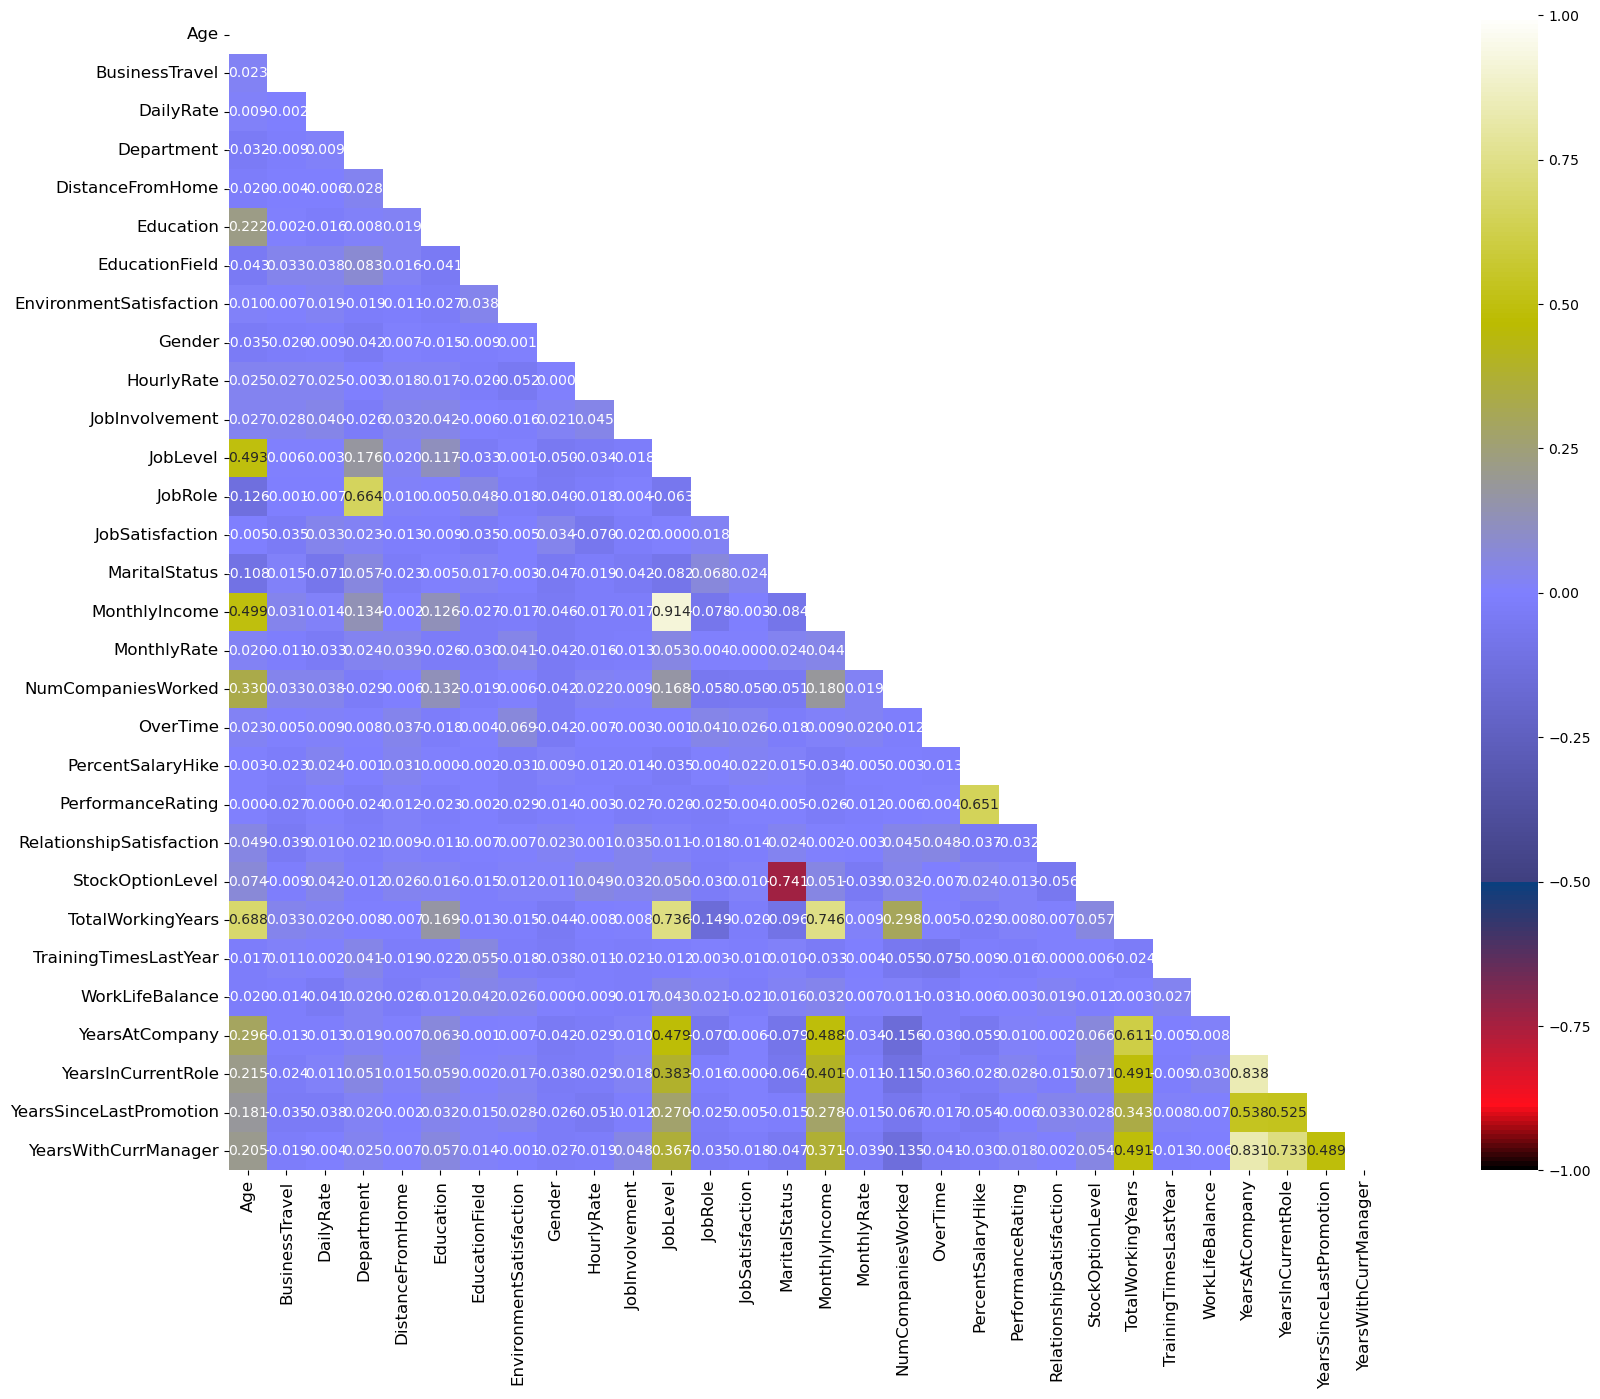

In [47]:
a = np.triu(data.corr())
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),vmin=-1,vmax = 1, annot = True, square = True, fmt='0.3f',
           annot_kws={'size':10},cmap='gist_stern',mask=a)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

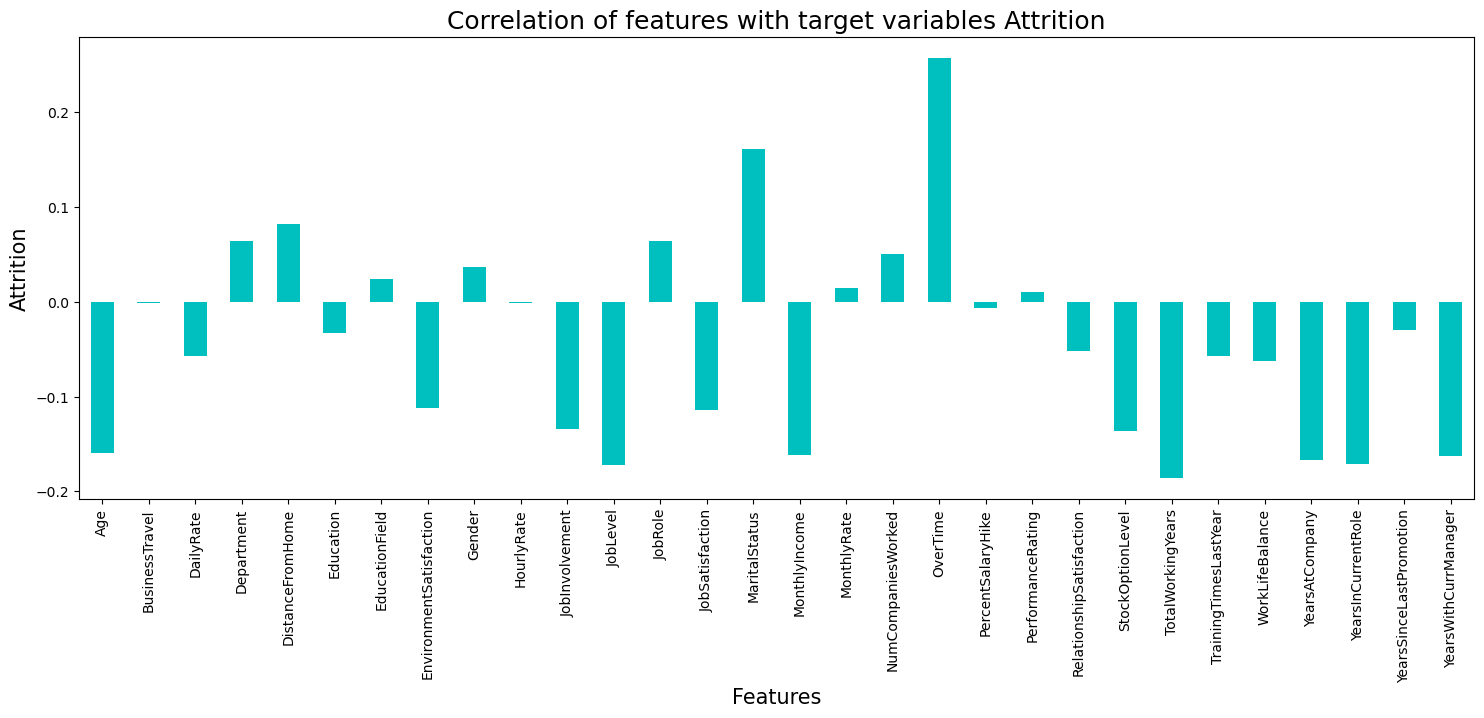

In [48]:
plt.figure(figsize=(18,6))
df.corr()['Attrition'].drop(['Attrition']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with target variables Attrition',fontsize=18)
plt.show()

**Observation-:**

- Age,JobLevel,MonthlyIncome is highly positively correlated with TotalWorkingYears.
- JobLevel is highly Positively correlated with the MonthlyIncome.
- PercentageSalaryHike is highly positively correlated with the column PerformanceRating.

# Checking Multicollinearity between features using variance_inflation_factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']=data.columns
vif

,VIF,Features
0,2.103475,Age
1,1.015631,BusinessTravel
2,1.022320,DailyRate
3,2.027022,Department
4,1.014061,DistanceFromHome
5,1.068566,Education
6,1.027363,EducationField
7,1.021627,EnvironmentSatisfaction
8,1.020116,Gender
9,1.022891,HourlyRate


**Observation-:**

**We can see that multicollinearity is when permissible limit of 10.**

# Balacing using SMOTE

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# oversampling using SMOTE Techniques
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [52]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Standard Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# PCA

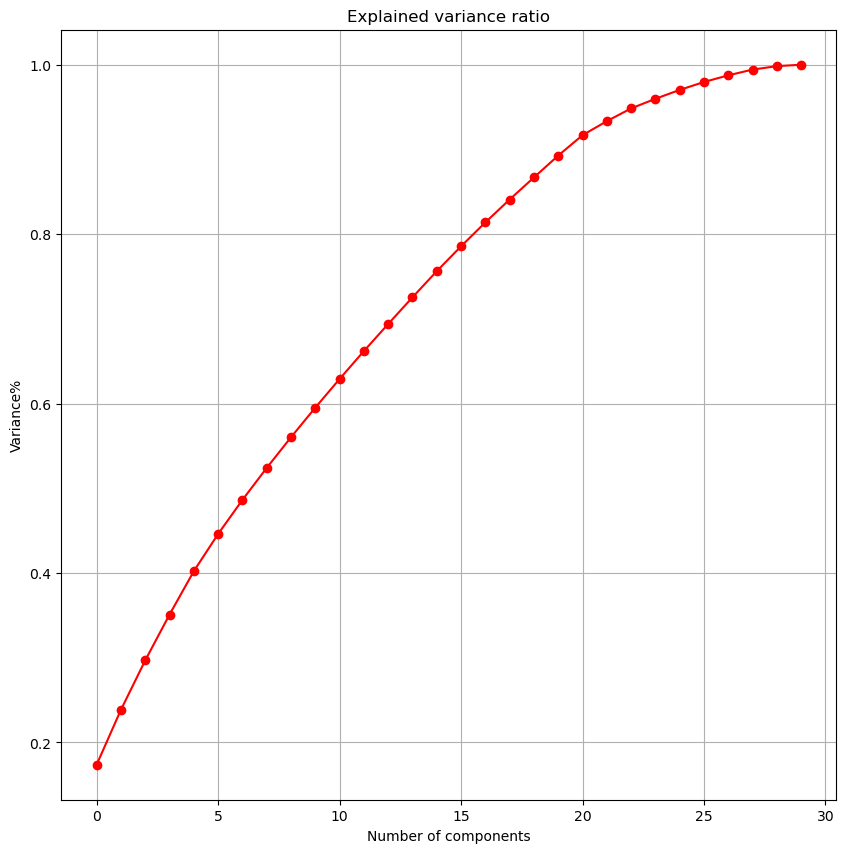

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title("Explained variance ratio")
plt.grid()

In [55]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(x_scale)

In [56]:
pri_x = pd.DataFrame(x_new, columns=np.arange(21))

**Observation-:**

As the graph, we can see that 21 pricipal components attributes for 90% of variables in the data. We shall pick the first 21 components for our prediction.

# Machine Learning Model Building

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [58]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (1652, 21)
Training target vector : (1652,)
Test feature matrix size : (814, 21)
Test target vector size : (814,)


# Finding Best random rate

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(pri_x,y,test_size = 0.33, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.8611793611793612 on Random_state 105


# Logistic Regression

In [60]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.33,random_state=242)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.8095823095823096
Confusion Matrix Of Logistic Regression :  [[303  92]
 [ 63 356]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.83      0.77      0.80       395
           1       0.79      0.85      0.82       419

    accuracy                           0.81       814
   macro avg       0.81      0.81      0.81       814
weighted avg       0.81      0.81      0.81       814



# Cros Validation Score

In [61]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.65384615 0.70385396 0.69776876 0.65922921 0.69776876]
Mean CVS Score :  0.6824933687002652
Std Deviation :  0.0213767819578499


# GaussianNB

In [62]:
g = GaussianNB()
g.fit(x_train,y_train)
y_pred = g.predict(x_test)
print("GaussainNB Classifier")
print('\n')
print("Accuracy Score Of GaussianNB Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of GaussianNB Classifier Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of GaussianNB Classifier Classifier : ", classification_report(y_test,y_pred))

GaussainNB Classifier


Accuracy Score Of GaussianNB Classifier :  0.8243243243243243
Confusion Matrix Of GaussianNB Classifier Classifier :  [[317  78]
 [ 65 354]]
Classification Report Of GaussianNB Classifier Classifier :                precision    recall  f1-score   support

           0       0.83      0.80      0.82       395
           1       0.82      0.84      0.83       419

    accuracy                           0.82       814
   macro avg       0.82      0.82      0.82       814
weighted avg       0.82      0.82      0.82       814



# Cross Validation Score

In [63]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.65384615 0.70385396 0.69776876 0.65922921 0.69776876]
Mean CVS Score :  0.6824933687002652
Std Deviation :  0.0213767819578499


# Applying other classification algorithm

In [64]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8894348894348895


Confusion Matrix 
 [[344  51]
 [ 39 380]]


Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       395
           1       0.88      0.91      0.89       419

    accuracy                           0.89       814
   macro avg       0.89      0.89      0.89       814
weighted avg       0.89      0.89      0.89       814



Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7886977886977887


Confusion Matrix 
 [[295 100]
 [ 72 347]]


Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       395
           1       0.78      0.83      0.80       419

    accuracy                           0.79       814
   macro avg       0.79      0.79      0.79       814
weighted avg       0.79      0.79      0.79       81

# CrossValidation

In [65]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.59109312 0.63083164 0.59229209 0.59837728 0.60243408]
Mean Score : 0.6030056417373595
Std Deviation 0.014510156371815986




Cross Validation Score DecisionTreeClassifier() is
Score [0.66194332 0.90060852 0.89858012 0.87221095 0.90872211]
Mean Score : 0.8484130047384024
Std Deviation 0.09403784900539497




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.70242915 0.72819473 0.73022312 0.72819473 0.71805274]
Mean Score : 0.7214188928398387
Std Deviation 0.010404611026789279




Cross Validation Score RandomForestClassifier() is
Score [0.69838057 0.98580122 0.98174442 0.97160243 0.97971602]
Mean Score : 0.9234489328329405
Std Deviation 0.1126292022957034




Cross Validation Score AdaBoostClassifier() is
Score [0.60323887 0.93914807 0.92494929 0.92697769 0.95131846]
Mean Score : 0.86912647510491
Std Deviation 0.1332799431424053




Cross Validation Score GradientBoostingClassifier() is
Score [0.58502024 0.97565923 0.95334

# Hyper Parameter Tunning: GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,None],
         'max_features':['auto','log2'],
          'bootstrap':[True]
         }]

In [68]:
gc = GridSearchCV(RandomForestClassifier(),param,cv = 5, n_jobs = -1,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, None],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=5)

In [69]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 100}

# Final Model

In [70]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'gini', max_depth = None , max_features = 'log2', n_estimators = 100)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8857493857493858


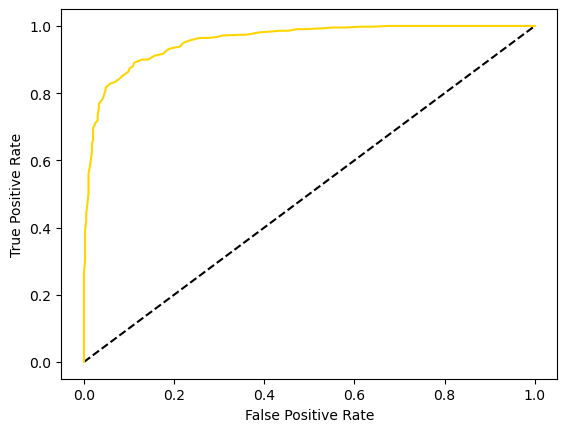

AUC SCORE 0.8861212652185735


In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = final.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(y_test,final.predict(x_test))
print("AUC SCORE", auc_score)

# Saving Model

In [72]:
import joblib
joblib.dump(final,"HR_ANALYTICS")

['HR_ANALYTICS']